In [2]:
import pandas as pd
import numpy as np

#all_data = pd.read_pickle('data_reduced_for_pycharm.pkl')
#pos = pd.read_pickle('pos_reduced_for_pycharm.pkl')
#omni = pd.read_pickle('omni_reduced_for_pycharm.pkl')

all_data = pd.read_pickle('reduced_multitask_data_for_pycharm.pkl')
pos = pd.read_pickle('reduced_multitask_pos_for_pycharm.pkl')
omni = pd.read_pickle('reduced_multitask_omni_for_pycharm.pkl')

from UTime import Windows
spectro_features = [f'spectro_{i}' for i in range(32)]
moments_features = ['Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'OMNI_Bx','OMNI_By','OMNI_Bz']
label_names = ['label_BL','label_coldions','label_MSH','label_MSP']
#label_names=['label_BL']
win_duration = np.timedelta64(30, 'm')

windows = Windows(all_data, pos, omni, win_duration, spectro_features=spectro_features, moments_features = moments_features, label = label_names, is_prepared=True)

In [1]:
mandatory = ['Bx','By','Bz', 'fft_searchcoil', 'max_cold_ions']  # 1

V_features = ['Vx','Vy','Vz']  # OR
V_features2 = ['Vtan1_MP','Vtan2_MP','Vn_MP']

norms = ['V','B']  # 0 or 1
jets = ['gap_to_MSH_Vtan1_MP_over_Va','gap_to_MSH_Vtan2_MP_over_Va']  # 0 or 1

particle = ['Np','Tp','anisotropy']  #OR
particle2 = ['Np','Tpara','Tperp']   #OR
log_particle = ['logNp','logTp','anisotropy']  #OR
log_particle2 = ['logNp','logTpara','logTperp']  # OR nothing

spectro_features = [f'spectro_{i}' for i in range(32)]   # OR
peak_detection_features = ['energy_main_pop', 'width_main_pop', 'flux_main_pop']  # OR
gaussian_fit_features = ['max_msp_popu','center_msp_popu','max_msh_popu','center_msh_popu'] # OR nothing

cold_ions_more = ['center_coldions','std_coldions']  # 0 or 1

gap_to_MSH_features = ['gap_to_MSH_Vx','gap_to_MSH_Vy', 'gap_to_MSH_Vz', 'gap_to_MSH_V','gap_to_MSH_logTp', 'gap_to_MSH_logNp', 'gap_to_MSH_anisotropy']   # OR
ref_MSH_features = ['ref_MSH_Vx','ref_MSH_Vy', 'ref_MSH_Vz', 'ref_MSH_V', 'ref_MSH_logTp', 'ref_MSH_logNp', 'ref_MSH_anisotropy']     # OR
relative_gap_MSH_features = [f'relative_gap_with_MSH_{feat}' for feat in ['Vx','Vy','Vz','V','Tp','Np','anisotropy']]     # OR nothing

gap_to_MSH_features2 = [f'gap_to_MSH_{feat}' for feat in ['Vtan1_MP','Vtan2_MP','Vn_MP']]   # OR
ref_MSH_features2 = [f'ref_MSH_{feat}' for feat in ['Vtan1_MP','Vtan2_MP','Vn_MP']]     # OR
relative_gap_MSH_features2 = [f'relative_gap_with_MSH_{feat}' for feat in ['Vtan1_MP','Vtan2_MP','Vn_MP']]   # OR nothing

individual_features = ['Bz_over_B']   # That don't fit in groups
    
    
    
    
features_yes_or_no = [norms, jets, cold_ions_more, individual_features]
features_multiple_choice = [[V_features, V_features2],
                            [particle, particle2, log_particle, log_particle2, []],
                            [spectro_features, peak_detection_features, gaussian_fit_features, []],
                            [gap_to_MSH_features, ref_MSH_features, relative_gap_MSH_features, []],
                            [gap_to_MSH_features2, ref_MSH_features2, relative_gap_MSH_features2, []]]

In [6]:
from UTime.GradientBoosting import get_all_feature_combinaisons_multiple_choices
test = get_all_feature_combinaisons_multiple_choices(features_yes_or_no, features_multiple_choice, mandatory)
test[200]

['Bx',
 'By',
 'Bz',
 'fft_searchcoil',
 'max_cold_ions',
 'Bz_over_B',
 'Vx',
 'Vy',
 'Vz',
 'Np',
 'Tpara',
 'Tperp',
 'energy_main_pop',
 'width_main_pop',
 'flux_main_pop',
 'gap_to_MSH_Vx',
 'gap_to_MSH_Vy',
 'gap_to_MSH_Vz',
 'gap_to_MSH_V',
 'gap_to_MSH_logTp',
 'gap_to_MSH_logNp',
 'gap_to_MSH_anisotropy',
 'gap_to_MSH_Vtan1_MP',
 'gap_to_MSH_Vtan2_MP',
 'gap_to_MSH_Vn_MP']

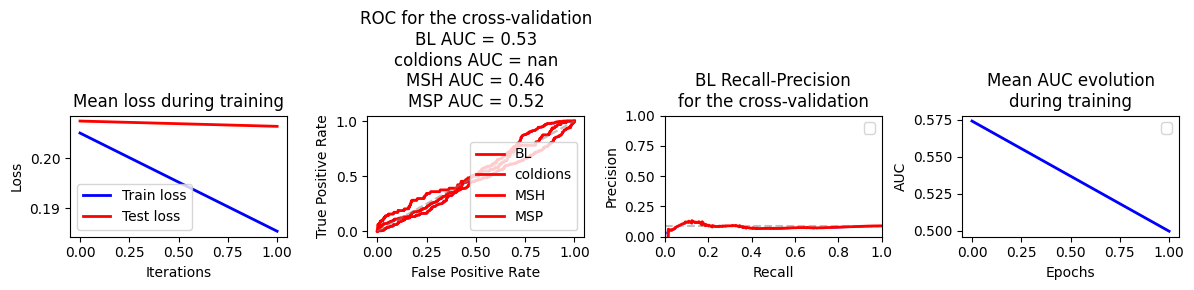

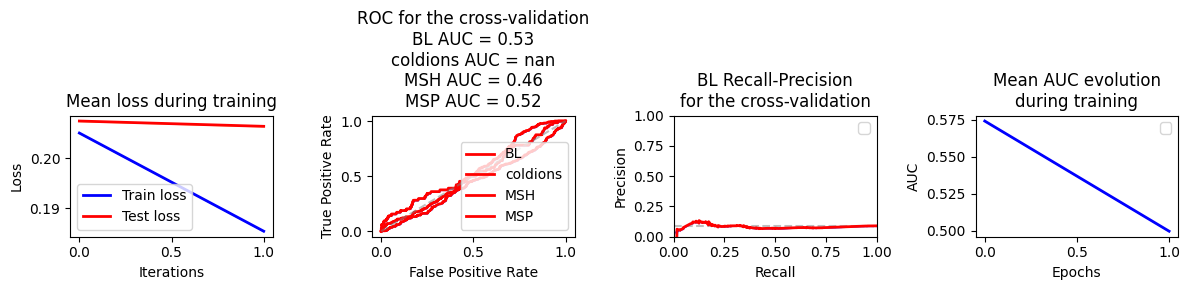

In [3]:
from UTime.architectureResNet import UTime
architecture = UTime(len(label_names), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 5, 16, 5, 2, nb_layers_common_encoder=3, label_names=label_names)
from UTime.CrossValidation import cross_validation
cv = cross_validation(architecture, windows, 1, 'MSE', epochs=2, test_ratio=0.5, plot_ROC=True,plot_recall_precision=True,patience=0)


In [6]:
cv['models'][0]

UTime(
  (encoder): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Conv2d(9, 16, kernel_size=(1, 5), stride=(1, 1), padding=same)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0, inplace=False)
    (6): Conv2d(16, 32, kernel_size=(1, 5), stride=(1, 1), padding=same)
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0, inplace=False)
    (11): Conv2d(32, 64, kernel_size=(1, 5), stride=(1, 1), padding=same)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
np.linspace(0, 1, 10)[:-1]

In [ ]:
import torch
from numpy.random import random
test = torch.Tensor(random((2,3,4,5)))
test.shape

In [ ]:
test[0,:,:,:].shape

In [ ]:
from torch.utils.data import DataLoader

dl = DataLoader(windows)
indice, inputs, labels = next(iter(dl))


In [ ]:
from UTime.architectureResNet import UTime
architecture = UTime(1, windows.win_length, len(windows.moments_features), len(windows.spectro_features), 5, 16, 5, 2)
from UTime.CrossValidation import cross_validation
cv = cross_validation(architecture, windows, 5, 'MSE', test_ratio=0.5, plot_ROC=True,batch_size=1,patience=20)


In [ ]:
# Test cuda with patience=0
from UTime.VaryParameter import vary_parameter
scores = vary_parameter(windows, train_proportion = np.array([0.4, 0.5]), patience=3, nb_iter = 1, batch_size=1, loss_function = 'MSE', description = 'stride=36', plot_ROC=True)

In [ ]:
from UTime.architectureMultipleKernels import UTime
model = UTime(len(windows.label), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 5, 16, 5, 2, [1,2,3,5]).double()
model

In [ ]:
from UTime.architectureMultitask import UTime
from UTime.CrossValidation import initialize_empty_scores, train_one_iter
import matplotlib.pyplot as plt

#model = UTime(len(windows.label), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 5, 10, 5, 2, [1,2,5]).double()
model = UTime(len(windows.label), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 5, 10, 5, 2, label_names=label_names).double()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
dict = initialize_empty_scores(windows)
dict = train_one_iter(model, 0, 'MSE', dl, dl, dict, fig, axes, plot_ROC = True, patience=10)

In [ ]:
dict['models'][0].scores(dl=dl)

In [ ]:
dict['models'][0].scores(prediction=dict['models'][0].forward(inputs), target=labels)

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(dict['models'][0].forward(inputs).detach().numpy().flatten(), label='pred')
plt.plot(labels.numpy().flatten(), label='labels')
plt.legend()

In [ ]:
#from UTime.architectureResNet import UTime
from UTime.architectureMultitask import UTime
from UTime.CrossValidation import initialize_empty_scores, train_one_iter
import matplotlib.pyplot as plt

model = UTime(len(windows.label), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 3, 6, 5, 4, label_names=windows.label).double()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
dict = initialize_empty_scores(windows)
dict = train_one_iter(model, 0, 'MSE', dl, dl, dict, fig, axes, plot_ROC = True, patience=0)

In [ ]:
dict['max_F1s'], dict['precisions'], dict['recalls'], dict['AUCs']

In [ ]:
from UTime.architectureMultitask import UTime
from UTime.CrossValidation import cross_validation
import matplotlib.pyplot as plt

model = UTime(len(windows.label), windows.win_length, len(windows.moments_features), len(windows.spectro_features), 3, 6, 5, 2, label_names=windows.label).double()
scores = cross_validation(model, windows, 2, 'MSE', batch_size=1, savefig='test', name='test', plot_ROC = True, patience=0)


In [ ]:
scores

In [ ]:
model_trained = dict['models'][0]
i, inputs, target = next(iter(dl))
pred = model_trained.forward(inputs)


In [ ]:
pred.shape

In [ ]:
pred[0][0]

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred[0][0].detach().numpy().flatten(), label='pred')
plt.plot(target[0][0].numpy().flatten(), label='target')
plt.legend()
plt.title('BL')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred[0][1].detach().numpy().flatten(), label='pred')
plt.plot(target[0][1].numpy().flatten(), label='target')
plt.legend()
plt.title('coldions')


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred[0][2].detach().numpy().flatten(), label='pred')
plt.plot(target[0][2].numpy().flatten(), label='target')
plt.legend()
plt.title('MSH')


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred[0][3].detach().numpy().flatten(), label='pred')
plt.plot(target[0][3].numpy().flatten(), label='target')
plt.legend()
plt.title('MSP')


In [ ]:
from UTime.CostFunctions import DiceLoss
DiceLoss().forward(model.forward(inputs), labels)

In [ ]:
from UTime.CostFunctions import IntersectionOverUnion as IoU
IoU().forward(model.forward(inputs), labels)

In [ ]:
from UTime.architectureMultipleKernels import UTime

model = UTime(1,
                 360,
                 len(windows.moments_features),
                 len(windows.spectro_features),
                 5,
                 16,
                 [3,5,15,32],
                 2).double()

pred = model.forward(inputs)

In [ ]:
model

In [ ]:
pred.shape

In [ ]:
labels.shape

In [ ]:
model

In [ ]:
from UTime.CrossValidation import cross_validation
scores = cross_validation(model, windows, 5, 'MSE', plot_ROC=True, batch_size=1)

In [ ]:
pred.shape

In [ ]:
labels.shape

In [ ]:
import torch

indice = 0

i = windows.windows_indices[indice]
subdf = windows.dataset.iloc[i - windows.win_length + 1:i + 1][windows.moments_features + windows.spectro_features + windows.label]

# subdf = self.dataset.iloc[i * self.win_length : (i+1) * self.win_length][self.moments_features + self.spectro_features + self.label]

spectro = torch.tensor(np.transpose(subdf[windows.spectro_features].values).reshape((1, len(windows.spectro_features), windows.win_length))).double()
_, nb_channels, n_time = spectro.shape

moments = torch.tensor(np.transpose(subdf[windows.moments_features].values).reshape((len(windows.moments_features), 1, windows.win_length))).double()
moments = moments.repeat(1,nb_channels,1)


In [ ]:
inputs = torch.concat((spectro,moments), dim = 0)

In [ ]:
inputs.shape

In [ ]:
moments.repeat(1,len(windows.moments_features),1).shape


In [ ]:
_, nb_channels, n_time = spectro.shape

In [ ]:
import torch
test = torch.Tensor([[1,2],[3,4]])
test.repeat(1,2)

In [ ]:
test.shape

In [ ]:
windows[0]

In [ ]:
all_data.index.values[0], all_data.index.values[-1]

In [ ]:
omni = omni.rename(columns={col:"OMNI_"+col for col in omni.columns})
omni = omni.ffill().bfill()

dataset = pd.concat([all_data, omni], axis = 1)

In [ ]:
def select_windows(df, condition):
    """ Needs to have one for all the points of the window, not only for the last one!
    Refactor flag function, and the counts of swapp."""

    if isinstance(condition, str):
        if condition == ('all'):
            return df
        else:
            return df[df[condition].values == True]
    elif isinstance(condition, list):
        if condition != []:
            subdf = select_windows(df, condition[0])
            return select_windows(subdf, condition[1:])
        else:
            return df
    else:
        raise Exception("Condition should be a string or a list of strings.")

np.unique(select_windows(dataset, ['isFull_select']).isDayside_select.values, return_counts=True)

In [ ]:
select_windows(dataset, ['isDayside_select'])


In [ ]:
from UTime.architecture import Architecture
    
Architecture(1,
        30,
                 10,
                 32,
                 5,
                 16,
                 5,
                 2, plot_ROC=True)

In [ ]:
from UTime.UTime import UTime
    
UTime(1,
        30,
                 10,
                 32,
                 5,
                 16,
                 5,
                 2, plot_ROC=True)

In [ ]:
(-1)//2

In [ ]:
import torch
from UTime.architectureResNet import UTime
import numpy as np

utime = UTime(1, 300, 8, 32, 2, 5, 3, 2).double()
moments = torch.tensor(np.random.rand(1,8,1,300)).double()
spectro = torch.tensor(np.random.rand(1,1,32,300)).double()
utime.forward((moments,spectro))

In [ ]:
training = Training(model, 2000, dl_train, dltest = dl_test, dlval=dl_test, validation=True,     # To make it more general, get those parameters from kwargs?
                                       learning_rate=0.001, verbose_plot = True if iter==0 else False, mirrored = True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.rcParams["text.usetex"] = False
mu_0 = 1.25663706 * 10**(-6)

def draw_HT(V_sh=10**(-2), B_MSP=10, B_MSH=1, rho_MSP=1, rho_MSH=4):
    dx = 3
    dy = 3
    plt.figure()
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    
    # Direction of B 
    plt.arrow(0.9*dx, -0.9*dy, -dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.85*dx, -0.85*dy, -dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(0.85*dx, 0.85*dy, dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.9*dx, 0.9*dy, dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
     
    # V_SH
    plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.2, overhang = 0.5)
    plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')
    
    # Alfven speed
    V_a_MSH = B_MSH/np.sqrt(mu_0*rho_MSH)
    V_a_MSHx = V_a_MSH*np.cos(np.arctan(dy/dx))
    V_a_MSHy = V_a_MSH*np.sin(np.arctan(dy/dx))

    V_a_MSP = B_MSP/np.sqrt(mu_0*rho_MSP)
    V_a_MSPx = V_a_MSP*np.cos(np.arctan(dy/dx))
    V_a_MSPy = V_a_MSP*np.sin(np.arctan(dy/dx))
    
    plt.arrow(dx, dy, V_a_MSHx, V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(-dx, dy, V_a_MSHx, -V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(dx, -dy, V_a_MSPx, -V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(-dx, -dy, V_a_MSPx, V_a_MSPy, head_width=0.2, overhang = 0.5, color = 'red')

    plt.text(0, -2*dy, 'MSP', ha = 'center')
    plt.text(0, 2*dy, 'MSH', ha = 'center')

    plt.show()
    
draw_HT()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_field_lines(dx, alpha):
    dy = dx*np.tan(alpha)
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')

    _,_ = plot_centered_arrow(0.9, dx, alpha, dx/100, dy/100, 'upper right', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, dx/100, -dy/100, 'upper left', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, -dx/100, -dy/100, 'lower left', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, -dx/100, dy/100, 'lower right', head_width=0.05*dx, overhang = 0.5, color = 'grey')

def plot_centered_arrow(close_to_center, dx_figure, alpha, dx_arrow, dy_arrow, loc, **kwargs):
    dy_figure = dx_figure*np.tan(alpha)
    center_distance_x = close_to_center*dx_figure
    center_distance_y = close_to_center*dy_figure
    
    if loc=='upper left':
        center_distance_x = -center_distance_x
    if loc=='lower right':
        center_distance_y = -center_distance_y
    if loc=='lower left':
        center_distance_x = -center_distance_x
        center_distance_y = -center_distance_y
        
    start_x = center_distance_x - dx_arrow/2
    start_y = center_distance_y - dy_arrow/2
        
    text = kwargs.pop('text','')
    #plt.text(center_distance_x, center_distance_y+0.1*dy, text, ha='center', color=kwargs.get('color','k'))
    plt.arrow(start_x, start_y, dx_arrow, dy_arrow, length_includes_head=True, label = text, **kwargs)
    return start_x, start_y

def alfven_speed(B, rho):
    return B/np.sqrt(mu_0*rho) 

def alfven_vector(Bx, By, rho):
    return alfven_speed(Bx, rho), alfven_speed(By, rho)

def plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, **kwargs):
    if 'to_label' in kwargs:
        kwargs.pop('to_label')
        text = '$V_A$'
    else:
        text = ''
    start, stop = plot_centered_arrow(0.5, dx, alpha, V_ax, V_ay, loc, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, text = text, **kwargs)
    return start, stop

def flip_vector(vx, vy, start_x, start_y, dx, **kwargs):
    vx, vy = -vx, -vy    
    plt.arrow(start_x, start_y, vx, vy, head_width=0.05*dx, overhang = 0.5, width=0.05, zorder=10, color=kwargs.get('color','k'), linestyle=':', length_includes_head=True)
    return vx, vy

def v_ht_msh(v_ax, v_ay, v_sh, start_x, start_y, dx, **kwargs):
    plt.arrow(start_x - v_sh, start_y, v_sh, 0, head_width=0.05*dx, overhang = 0.5, width=0.05, zorder=10, color='k', linestyle=':', length_includes_head=True)
    if v_ay < 0:
        v_ax, v_ay = flip_vector(v_ax, v_ay, start_x, start_y, dx, color='red')   
    
    v_ht_y = v_ay
    v_ht_x = v_ax + v_sh
    if 'to_label' in kwargs:
        plt.arrow(start_x - v_sh, start_y, v_ht_x, v_ht_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', label = '$V_{HT}$', length_includes_head=True)
    else:
        plt.arrow(start_x - v_sh, start_y, v_ht_x, v_ht_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', length_includes_head=True)
    
    return v_ht_x, v_ht_y, start_x, start_y

def v_bl(v_ax, v_ay, v_HT_x, v_HT_y, start_x, start_y, dx, **kwargs):
    if v_ay > 0:
        v_ax, v_ay = flip_vector(v_ax, v_ay, start_x, start_y, dx, color='red')   

    plt.arrow(start_x + v_ax, start_y + v_ay, v_HT_x, v_HT_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', length_includes_head=True)
    
    v_bl_y = v_HT_y + v_ay
    v_bl_x = v_HT_x + v_ax
    if 'to_label' in kwargs:
        plt.arrow(start_x, start_y, v_bl_x, v_bl_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='purple', label='$V_{BL}$', length_includes_head=True)
    else:
        plt.arrow(start_x, start_y, v_bl_x, v_bl_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='purple', length_includes_head=True)
    
    return v_bl_x, v_bl_y, start_x, start_y

def draw_v_ht_msh(B, alpha, loc, rho, dx, **kwargs):
    Bx = B*np.cos(alpha)
    By = B*np.sin(alpha)
    if loc=='upper left' or loc=='lower right':
        By = -By
    
    V_ax, V_ay = alfven_vector(Bx, By, rho)
    start_x, start_y = plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, color='r')
    
    v_HT_x, v_HT_y, start_x, start_y = v_ht_msh(V_ax, V_ay, V_sh, start_x, start_y, dx, **kwargs)
    
    return v_HT_x, v_HT_y

def draw_v_ht_msp(B, alpha, loc, rho, v_HT_x, v_HT_y, dx, **kwargs):
    Bx = B*np.cos(alpha)
    By = B*np.sin(alpha)
    if loc=='upper left' or loc=='lower right':
        By = -By
    
    V_ax, V_ay = alfven_vector(Bx, By, rho)
    start_x, start_y = plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, color='r', **kwargs)
    
    v_bl_x, v_bl_y, start_x, start_y = v_bl(V_ax, V_ay, v_HT_x, v_HT_y, start_x, start_y, dx, **kwargs)
    
    return v_bl_x, v_bl_y

In [ ]:
mu_0 = 1
V_sh=2
B_MSP=-8
B_MSH=6
rho_MSP=2
rho_MSH=4
alpha = np.pi/10

# B_MSP and B_MSH are positive values, it's only for the magnitudes, because in our configuration, B_MSH goes towards the right, and B_MSP towards the left

dx = 25
dy = np.tan(alpha)*dx
fig = plt.figure(figsize=(dx,dy))
plot_field_lines(dx, alpha)

# V_SH
plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.05*dx, overhang = 0.5, label ='$V_{sh}$', length_includes_head=True)
#plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')

# Alfven speed
v_HT_x, v_HT_y= draw_v_ht_msh(B_MSH, alpha, 'upper right', rho_MSH, dx, to_label=True)  
v_bl_x, v_bl_y = draw_v_ht_msp(B_MSP, alpha, 'lower right', rho_MSP, v_HT_x, v_HT_y, dx, to_label=True)

v_HT_x, v_HT_y = draw_v_ht_msh(B_MSH, alpha, 'upper left', rho_MSH, dx)
v_bl_x, v_bl_y = draw_v_ht_msp(B_MSP, alpha, 'lower left', rho_MSP, v_HT_x, v_HT_y, dx)

plt.text(0, -0.7*dy, 'MSP', ha = 'center')
plt.text(0, 0.7*dy, 'MSH', ha = 'center')

# V_HT
#v_HT_left = v_ht(V_ax_MSH, V_ay_MSH, V_sh)
#v_HT_left = v_ht(V_ax_MSH, V_ay_MSH, V_sh)

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.rcParams["text.usetex"] = False

def draw_HT(V_sh, B_MSP, B_MSH, rho_MSP, rho_MSH):
    # V_sh's module is in proportion of |V_a_MSH| and the sign gives its direction
    # |V_a_MSH| = 1 in the drawing
    
    dx = 3
    dy = 3
    plt.figure()
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    
    # Direction of B 
    plt.arrow(0.9*dx, -0.9*dy, -dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.85*dx, -0.85*dy, -dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(0.85*dx, 0.85*dy, dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.9*dx, 0.9*dy, dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
     
    # V_SH
    plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.2, overhang = 0.5)
    plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')
    
    # Alfven speed
    V_a_MSH = B_MSH/np.sqrt(mu_0*rho_MSH)
    V_a_MSP = B_MSP/np.sqrt(mu_0*rho_MSP)
    
    plt.show()
    
draw_HT(-2)